In [14]:
import numpy
import pygad
import imageio
import matplotlib
import GARI

In [15]:
# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = imageio.imread('z.png')
target_im = numpy.asarray(target_im/255, dtype=float)
# Target image after enconding. Value encoding is used.
target_chromosome = GARI.img2chromosome(target_im)

In [16]:
def fitness_fun(solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness


ga_instance = pygad.GA(num_generations=1000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

In [17]:
ga_instance.run()

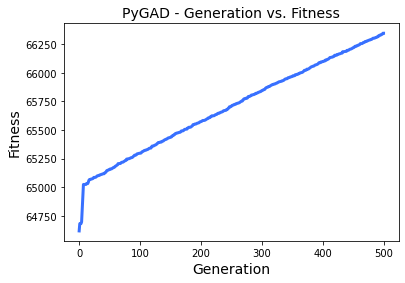

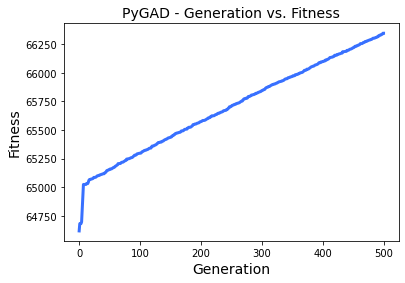

In [18]:
ga_instance.plot_fitness()

Fitness value of the best solution = 66347.05090176311
Index of the best solution : 0
Best fitness value reached after 499 generations.


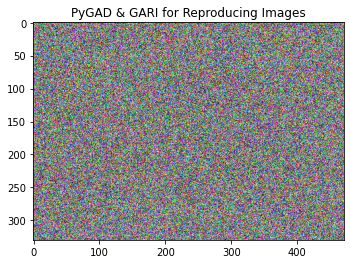

In [19]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = GARI.chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()